In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Definindo as constantes e parâmetros
m = 2**32
a = 1664525
c = 1013904223
x0 = 123456789


In [10]:
# Função para gerar números pseudo-aleatórios congruenciais
def congruential_random(n, m, a, c, x0):
    x = np.zeros(n)
    x[0] = x0
    for i in range(1, n):
        x[i] = (a*x[i-1] + c) % m
    return x/m

In [11]:
# Simulação do Random Walk em 1 + 1 dimensões
n_walks = 10
n_steps = 10000
steps = congruential_random(n_walks*n_steps, m, a, c, x0)
steps = np.where(steps < 0.5, -1, 1)
steps = np.reshape(steps, (n_walks, n_steps))

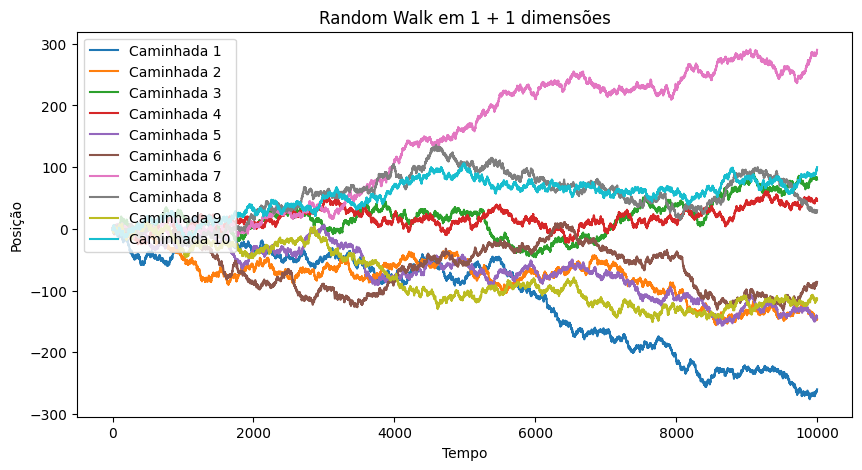

In [12]:
# Plot das 10 caminhadas juntas
plt.figure(figsize=(10,5))
plt.title('Random Walk em 1 + 1 dimensões')
plt.xlabel('Tempo')
plt.ylabel('Posição')
for i in range(n_walks):
    plt.plot(np.cumsum(steps[i]), label='Caminhada {}'.format(i+1))
plt.legend(loc='upper left')

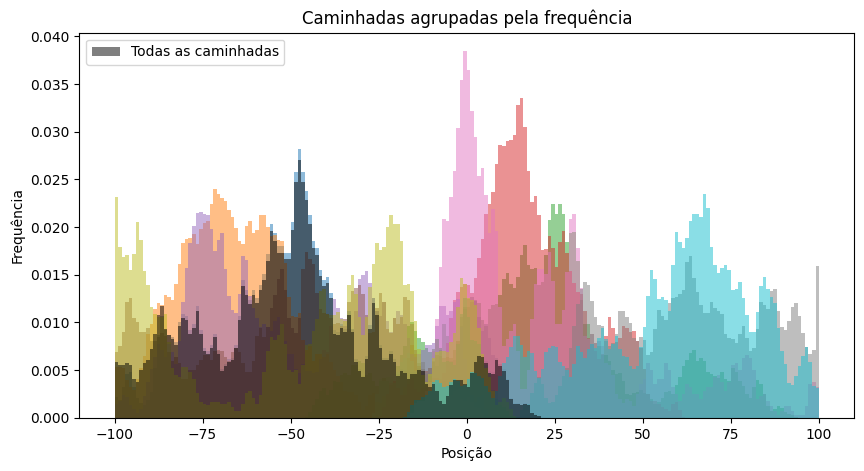

In [13]:
# Plot das caminhadas agrupadas pela frequência
plt.figure(figsize=(10,5))
plt.title('Caminhadas agrupadas pela frequência')
plt.xlabel('Posição')
plt.ylabel('Frequência')
bins = np.arange(-100, 101)
# inicializa as listas para armazenar as posições das caminhadas
for i in range(n_walks):
    plt.hist(np.cumsum(steps[i]), bins=bins, alpha=0.5, density=True)
plt.hist(np.cumsum(steps), bins=bins, color='k', alpha=0.5, density=True, label='Todas as caminhadas')
plt.legend(loc='upper left')

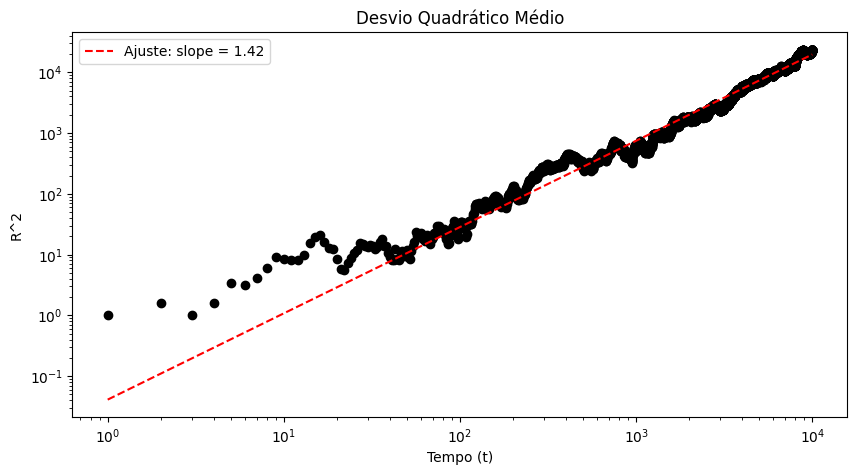

In [14]:
# Cálculo do desvio quadrático médio e plot em escala log-log
t = np.arange(n_steps) + 1
r2 = np.mean(np.cumsum(steps, axis=1)**2, axis=0)
plt.figure(figsize=(10,5))
plt.title('Desvio Quadrático Médio')
plt.xlabel('Tempo (t)')
plt.ylabel('R^2')
plt.loglog(t, r2, 'ko')
slope, intercept = np.polyfit(np.log(t), np.log(r2), 1)
plt.loglog(t, np.exp(intercept)*t**slope, 'r--', label='Ajuste: slope = {:.2f}'.format(slope))
plt.legend()

Rejeita-se a hipótese nula H0 de que o Random Walk é verdadeiro (slope = 1) com um nível de significância de 0.05.
Expoente da lei de potência: 1.4192997847200421
Estatística de teste t: 29.25778878573766
p-valor: 1.2636647392021002e-180


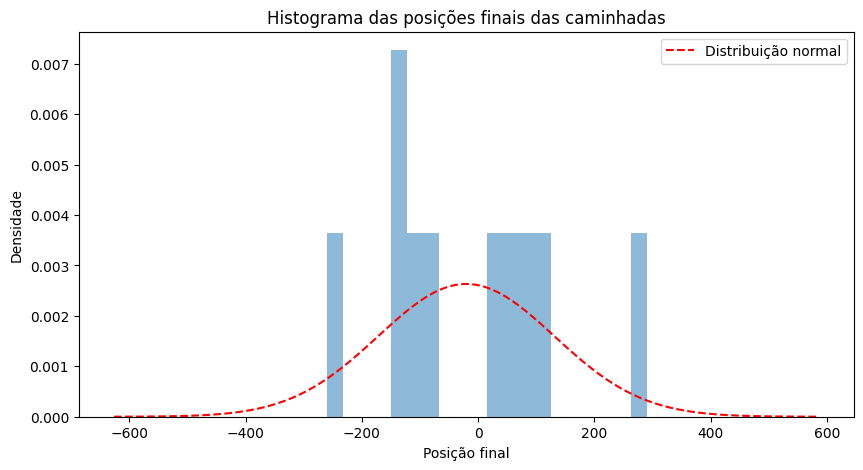

In [15]:
# Teste de hipóteses para o expoente da lei de potência
t_statistic = (slope - 1) / (np.std(np.log(r2)) / np.sqrt(n_steps))
p_value = stats.t.sf(np.abs(t_statistic), n_steps-2)*2
alpha = 0.05
t_critical = np.abs(np.round(stats.t.ppf(alpha/2, n_steps-2), 2))

if np.abs(t_statistic) < t_critical:
    print('Aceita-se a hipótese nula H0 de que o Random Walk é verdadeiro (slope = 1) com um nível de significância de {:.2f}.'.format(alpha))
else:
    print('Rejeita-se a hipótese nula H0 de que o Random Walk é verdadeiro (slope = 1) com um nível de significância de {:.2f}.'.format(alpha))
print('Expoente da lei de potência:', slope)
print('Estatística de teste t:', t_statistic)
print('p-valor:', p_value)

# Verificação do Teorema Central do Limite
final_positions = np.sum(steps, axis=1)
plt.figure(figsize=(10,5))
plt.hist(final_positions, bins=20, density=True, alpha=0.5)
mu = np.mean(final_positions)
sigma = np.std(final_positions)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', label='Distribuição normal')
plt.title('Histograma das posições finais das caminhadas')
plt.xlabel('Posição final')
plt.ylabel('Densidade')
plt.legend()

plt.show()